# Lecture 19

## Random Permutations

In many systems, especially in Monte Carlo simulations, we often require a way to randomly rearrange or choose elements from a given set. This process is called a *random permutation*.

### Basic Idea

- Consider an array (or list) of $N$ distinct elements $\{a, b, c, d, ...\}$
- The aim is to generate a random permutation of this array -- that is, to randomly reorder its elements
- Once we have a randomly permuted array, we can choose a subset of $m < N$ elements from it. This gives us a randomly selected sample without replacement.
- One may also attempt to generate *all* possible permutations (i.e., $N!$ different orderings), though this is only computationally feasible for small $N$, as the number of permutations grows factorially

### Algorithm Used:

One basic method to shuffle the array is as follows:

1. We pick an element randomly from the array
2. Then, we remove it from the array
3. We pick the next element from the remaining elements
4. This process is repeated until all elements have been picked once

This guarantees a random permutation, but it involves modifying the array at each step, which becomes inefficient for large arrays.

A more efficient approach is to shuffle the array in-place, without removing elements. The general idea involves

1. Traverse the array from the first element to the last
2. At each step, swap the current element with a randomly chosen element from the current index onward

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def shuffle(arr):
    N = len(arr)
    for i in range(N - 1):
        l = i + int((N - i) * np.random.random()) # i = 6 gives 0 from 2nd term
        dummy = arr[i]
        arr[i] = arr[l]
        arr[l] = dummy
    return arr

In [6]:
shuffle(np.array([0, 1, 2, 3]))

array([3, 0, 1, 2])

## Page Fault

When working with extremely large matrices, such as those of size $10^4 \times 10^4$, the entire dataset often cannot fit into the computer’s RAM at once. As a result, only portions of the matrix -- called memory pages -- are loaded into RAM when needed. If we attempt to access two elements located in different parts of the matrix, for example $M[123, 4567]$ and $M[1987, 78901]$, the system may need to load two separate memory pages to retrieve them. This process of loading a page from disk or a slower part of memory into RAM is known as a *page fault*. While the actual computation -- such as adding the two values -- takes very little time (*CPU time*), the page loading introduces significant delay.

## Lagrange Interpolation

Lagrange interpolation is a method used to estimate the value of a function between a set of known data points. Suppose we have $n$ known points $(x_0, y_0), (x_1, y_1), \ldots, (x_{n-1}, y_{n-1})$. We want to find a polynomial $f_L(x)$ of degree $n-1$ that exactly passes through all these points. The idea is to construct basis polynomials $L_i(x)$ such that

$L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n-1} \frac{x - x_j}{x_i - x_j}$

Each $L_i(x)$ is 1 at $x = x_i$ and 0 at all other $x_j$ (with $j \neq i$). The interpolating polynomial is given by

$f_L(x) = \sum_{i=0}^{n-1} y_i L_i(x)$

This polynomial matches the original data exactly at the given points. It is particularly useful when we have a small set of known values and want a smooth estimate in between. However, for larger $n$, the interpolation can become unstable, so one must carefully choose points.

Let us take $f(x) = \frac{1}{1+x^2}$, make a data set, $f(x)$ for x from -5 to 5, then pick any $x$, and find $f_L(x)$ using the Lagrange interpolation. 

In [12]:
def f(x):
    return 1/(1 + x**2)

def lagrange(x_data, y_data, x):
    total = 0
    n = len(x_data)
    for i in range(n):
        xi, yi = x_data[i], y_data[i]
        term = yi
        for j in range(n):
            if j != i:
                term *= (x - x_data[j])/(xi - x_data[j])
        total += term
    return total

In [25]:
x_data = np.linspace(-5, 5, 15)
y_data = f(x_data)

x_interpol = 2.5 # choosing a random point to interpolate
fL_interpol = lagrange(x_data, y_data, x_interpol)
f_true = f(x_interpol)

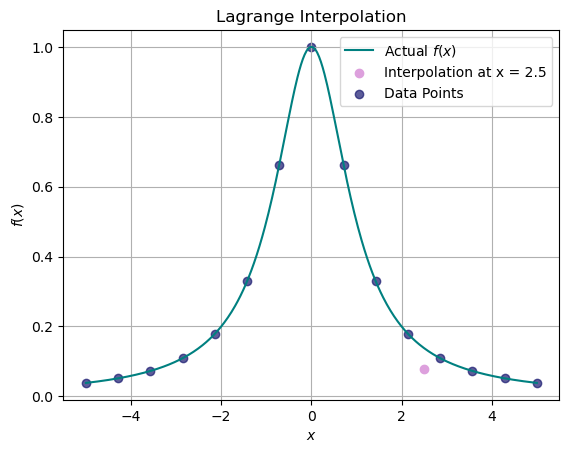

In [26]:
x = np.linspace(-5, 5, 500)
y = f(x)
y_interpol = [lagrange(x_data, y_data, xi) for xi in x]

plt.plot(x, y, color = 'teal', label = 'Actual $f(x)$')
plt.scatter([x_interpol], [fL_interpol], color = 'plum', label = f'Interpolation at x = {x_interpol}')
plt.scatter(x_data, y_data, alpha = 0.7, color = 'midnightblue', label = 'Data Points')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

## Special Integrals (Theory)

The integral $\int_0^1 x^{-2/3} f(x)\,dx$ appears problematic at first because the integrand diverges as $x \to 0$. Specifically, the factor $x^{-2/3}$ blows up near the lower limit, suggesting a possible divergence. However, this doesn't necessarily mean the integral *diverges*. To see why, we can expand the function $f(x)$ around $x = 0$, assuming it is smooth there. We write $f(x) = f(0) + \text{(corrections)}$, where the corrections are higher-order terms in $x$. Substituting into the integral, we get

$\int_0^1 x^{-2/3} f(x)dx = \int_0^1 x^{-2/3} [f(0) + O(x)]dx$

Separating the integral,

$= f(0) \int_0^1 x^{-2/3}dx + \int_0^1 x^{-2/3} O(x)dx$

The first term evaluates to a finite result since $\int_0^1 x^{-2/3}dx = \left[3x^{1/3}\right]_0^1 = 3$. The second term, involving higher powers of $x$, is also finite. Therefore, despite the integrand being divergent at a point, the total integral converges and yields a finite value.